## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Following is a dataset containing plastic waste per person in Kg/day

In [2]:
plastic = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')

In [3]:
plastic.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [4]:
#Rename the lengthy named columns
plastic.columns
plastic.rename(columns={'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)',
                   'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [5]:
# removing entities/countries with incomplete/missing data
incomplete_data_index = plastic[(plastic['Total Population'].isna()) & (plastic['GDP per capita'].isna())].index
plastic.drop(incomplete_data_index, inplace=True)

In [6]:
# new dataframe that takes in the required data (by year 2010)
data = plastic[plastic['Year'] == 2010]
data = data.drop(columns='Continent')

In [7]:
# retrieving continent names (from 2015 data)
con_names = plastic[plastic['Year'] == 2015]
data['Continent'] = con_names['Continent'].values

In [8]:
# dropping rows with missing Continent values using index
miss_index = data[data['Continent'].isna()].index
data.drop(miss_index, inplace=True)

In [9]:
# dropping rows with missing per person waste generation values
data = data[data['Waste per person(kg/day)'].notna()]

waste_gener = data.reset_index().drop('index', axis=1)

In [10]:
waste_gener.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


### Following is a dataset containing mismanaged plastic waste per person in Kg/day

In [11]:
plastic_2 = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [12]:
plastic_2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                     'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                     'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)
plastic_2.drop('Continent', axis=1, inplace=True)

In [13]:
# new dataframe for the required data
data2 = plastic_2[plastic_2['Year'] == 2010]

In [14]:
# dropping rows with missing mismanaged waste values
data2 = data2[data2['Mismanaged waste per person(kg/day)'].isna() != True]

waste_misma = data2.reset_index().drop('index', axis=1)

In [15]:
# joining both the dataframes
plastic_waste = pd.merge(waste_gener, waste_misma, how='inner')

In [16]:
# rearranging columns in the dataframe
plastic_waste.columns.tolist()
col_list = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']
plastic_waste = plastic_waste[col_list]

# rounding the values per person
plastic_waste.iloc[:, 3:5] = np.around(plastic_waste[['Waste per person(kg/day)', 
                                                      'Mismanaged waste per person(kg/day)']], decimals=2)

# changing datatype
plastic_waste['Total Population'] = plastic_waste['Total Population'].astype(int)

### Generating Total waste and Total mismanaged waste by country<br>
<ul><li>Total waste is achieved by using the product of waste generated per person per day and the total population of that country.</li><br>
<li>Total mismanaged waste is achieved by using the product of mismanaged waste per person a day and the total population of that country.</li></ul><br>

<i>Both are then multiplied by 365 to get the value for a year.</i>

In [17]:
plastic_waste['Total waste(kgs/year)'] = ((plastic_waste['Waste per person(kg/day)'] * 
                                    plastic_waste['Total Population']) * 365)
plastic_waste['Total waste mismanaged(kgs/year)'] = ((plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    plastic_waste['Total Population']) * 365)


plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


### Following graphs (Figure 1 & 2) shows the relationship between:<br>
####  1. Mismanaged waste & GDP
####  2. Waste Generated & GDP<br>

<b><i>Two Hypotheses were made</i></b>, proposing a relation between the GDP and waste generated/waste mismanaged per person a day.<br>

   <ol><li>More the GDP per Capita of an entity more would be the waste mismanaged per person.</li><br>
   <li>More the GDP per Capita of an enity more would be the waste generation per person.</li></ol>

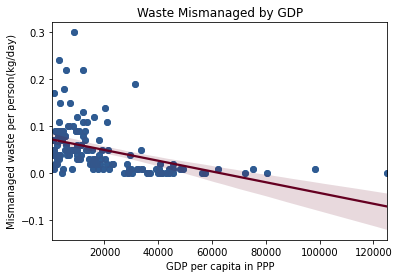

In [18]:


plt.scatter(plastic_waste['GDP per capita in PPP'], plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged by GDP', loc='center')
plt.ylabel('Mismanaged waste per person(kg/day)')
plt.xlabel('GDP per capita in PPP')

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})

plt.show()

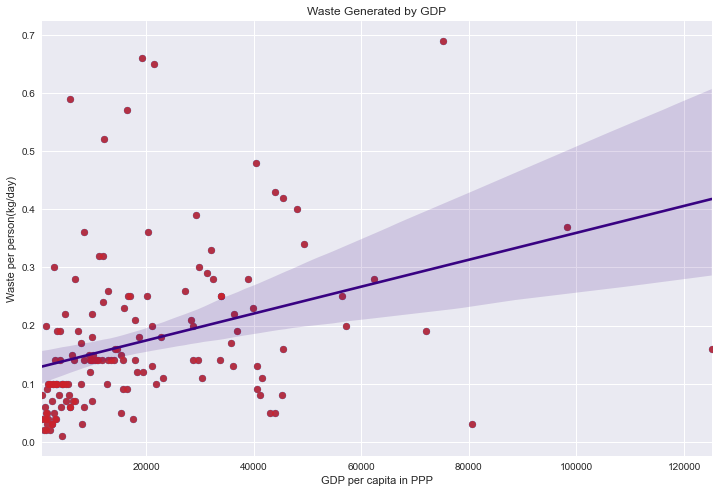

In [19]:
%matplotlib inline

plt.style.use('seaborn')
plt.figure(2, figsize=(12,8))

plt.scatter(plastic_waste['GDP per capita in PPP'], plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center')
plt.ylabel('Waste per person(kg/day)')
plt.xlabel('GDP per capita in PPP')

sns.regplot(x=plastic_waste['GDP per capita in PPP'], y=plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()

## By the above presented graphs it can be seen that:<br>
<ul><li>Mismanaged waste <b><u>does not</u></b> increase with an increase in entity's GDP per capita.
        Hence, the evidence is enough to reject the claim.</li><br>
    <li>Generated waste <b><i><u>tend to</u></i></b> increase with entity's GDP per capita.
            Hence, there is enough evidence to support the claim.</li></ul>

In [20]:
# creating a CSV file of the cleaned data
plastic_waste.to_csv('plastic_waste.csv')

## finished